# Advanced matplotlib tricks

The most common tricks to get the publication-ready figures for your contact map plots are described in [Customizing contact map plots](custom_plotting.ipynb). Here we will illustrate a few more advanced techniques. In general, we recommend getting familiar with [matplotlib](https://matplotlib.org/) through its own documentation, but some of the recipes below may be useful.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mdtraj as md
traj = md.load("5550217/kras.xtc", top="5550217/kras.pdb")

In [2]:
from contact_map import ContactFrequency
traj_contacts = ContactFrequency(traj)
frame_contacts = ContactFrequency(traj[0])
diff = traj_contacts - frame_contacts

## Advanced color schemes

In some cases, matplotlib's built-in color maps may not be sufficient. You may want to create custom color schemes, either as a matter of personal style or to create schemes that place more emphasis on certain values. To do this, the `diverging_cmap` keyword in Contact Map Explorer's plotting function can be useful, as can some matplotlib techniques.

### Customizing whether a color map is treated as diverging or sequential

As discussed in [Changing the color map](custom_plotting.ipynb#Changing-the-color-map), Contact Map Explorer tries to be smart about how it treats diverging color maps: if the data includes negative values (as possible with a contact difference), then the color map spans the values from -1 to 1. On the other hand, if the data only includes positive values and if the color map is diverging, then only the upper half of of the color map is used.

The diverging color maps that Contact Map Explorer recognizes are the ones listed as "Diverging" [in the matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html). The sequential color maps recognized by Contact Map Explorer are the ones listed as "Perceptually Uniform Sequential", "Sequential", or "Sequential (2)". Other color maps are not recognized by Contact Map Explorer, and by default will be treated as sequential while raising a warning:

/Users/dwhs/Dropbox/pysrc/contact_map/contact_map/plot_utils.py:31: UserWarning: Unknown colormap: Treating as sequential.
  warnings.warn("Unknown colormap: Treating as sequential.")


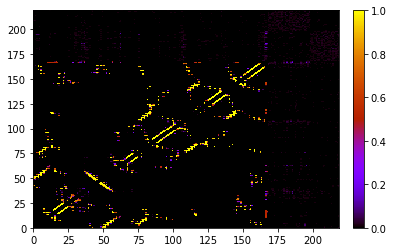

In [3]:
traj_contacts.residue_contacts.plot(cmap="gnuplot");

If you want to either force a sequential color map to use the only the upper half of the color space, or to force a diverging color map to use the full color space, use the `diverging_cmap` option in the color map. Setting `diverging_cmap` will also silence the warning for an unknown color map. This is particularly useful for user-defined custom color maps, which could be either diverging or sequential.

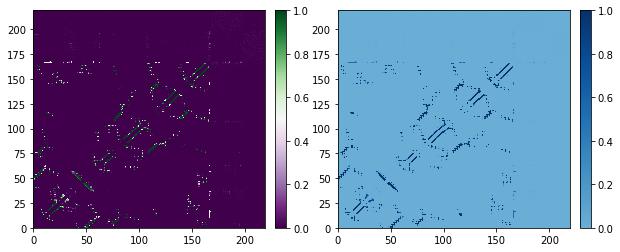

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# force a diverging color map to use the full color space, not just upper half
# (as if it is not diverging)
traj_contacts.residue_contacts.plot_axes(ax=axs[0], cmap='PRGn', diverging_cmap=False);

# force sequential color map to use only the upper half (as if it is diverging)
traj_contacts.residue_contacts.plot_axes(ax=axs[1], cmap='Blues', diverging_cmap=True);

### "Clipping" at high or low values

You might be interested in somehow marking which values are very high or very low. This can be done by creating a custom color map. Details on this can be found [in the matplotlib documentation on colormap manipulation](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html). The basic idea we'll implement here is to use the `'PRGn'` colormap, but to make values below -0.9 show up as red, and values above 0.9 show up as blue. We do this by making a color map based on 200 colors; the first 10 (-1.0 to -0.9) are red, then we use 180 representing the PRGn map (-0.9 to 0.9), and finally the last 10 (0.9 to 1.0) are blue. Note that colors in this approach are actually discrete, so you need enough colors from the PRGn map to make it a reasonable model for continuous behavior. For truly continuous color maps, see matplotlib documentation on `LinearSegmentedColormap`.

This is very similar in principle to one of the matplotlib examples on ["Creating listed colormaps"](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#creating-listed-colormaps).

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy as np

PRGn = cm.get_cmap('PRGn', 180)
red = np.array([1.0, 0.0, 0.0, 1.0])
blue = np.array([0.0, 0.0, 1.0, 1.0])

In [6]:
# custom color map of 200 colors with bottom 10 red; top 10 blue; rest is normal PRGb
new_colors = np.array([red] * 10 + list(PRGn(np.linspace(0, 1, 180))) + [blue] * 10)
custom_cmap = ListedColormap(new_colors)

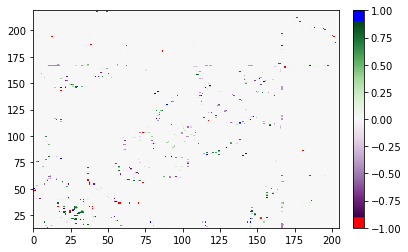

In [7]:
# must give diverging_cmap here; custom map is unknown to Contact Map Explorer
diff.residue_contacts.plot(cmap=custom_cmap, diverging_cmap=True);